### Generating random points from a sin function with noise

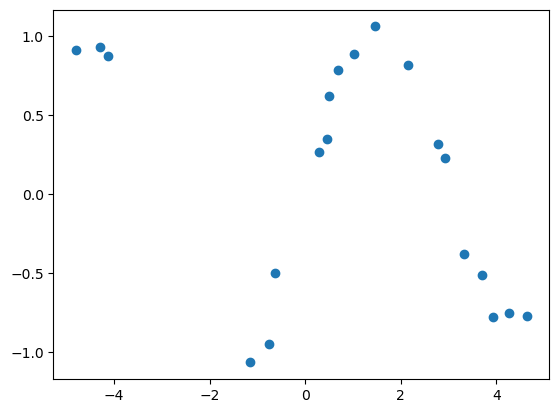

In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
X = np.random.uniform(-5, 5, size=(20, 1))
y = np.sin(X[:, 0]) + np.random.normal(0, 0.1, size=(20,))
plt.scatter(X,y)

### Fitting the simulated data with the sklearn library's GP

First, we use the sklearn library to see how the curve fits, and the optimal lengthscales and likelihoods.

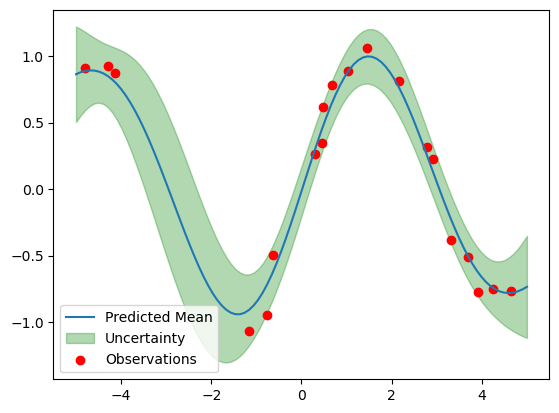

lengthscale RBF(length_scale=1.55)
likelihood: -10.954387616218558


In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = RBF(length_scale=1.0)

gp = GaussianProcessRegressor(kernel=kernel, alpha=0.16)

gp.fit(X, y)

# Generate some test data
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)

y_mean, y_std = gp.predict(X_test, return_std=True)

plt.plot(X_test, y_mean, label='Predicted Mean')
plt.fill_between(X_test[:, 0], y_mean - y_std, y_mean + y_std, alpha=0.3, label='Uncertainty',color='green')
plt.scatter(X[:, 0], y, label='Observations', color='red')
plt.legend()
plt.show()
print('lengthscale', gp.kernel_)
print('likelihood:',gp.log_marginal_likelihood_value_)


### Fitting the simulated data with the class I created

See how it fits and how it compares to sklearn's. Note that $\sigma_n^2 = \alpha$. Since in the sklearn example I set $\alpha = 0.16$, in order to match that I set $\sigma_n = 0.4$ 

Optimization terminated successfully.
         Current function value: 29.872225
         Iterations: 21
         Function evaluations: 42


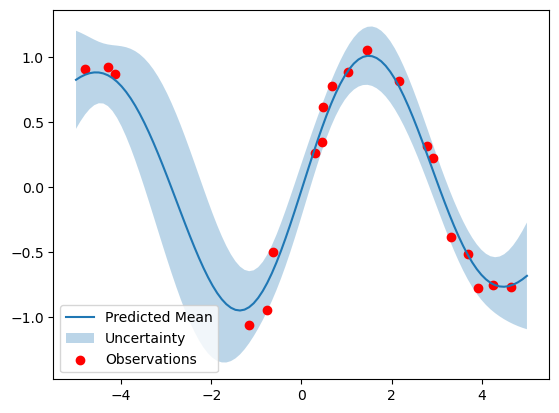

lengthscale [1.34438613]
likelihood: -29.872225472545175


In [10]:
from GPR_CHOL_LS import GaussianProcessRegressionLengthscaleCholesky

signal_variance = 1 #1
lengthscale = 1 #0.3
sigma_n = 0.4#0.1
gp = GaussianProcessRegressionLengthscaleCholesky("Squared Exponential", X, y, [signal_variance,lengthscale], sigma_n)

gp.fit()

X_test = np.linspace(-5, 5, 100).reshape(-1, 1)

y_mean, y_std = gp.predict(X_test)

plt.plot(X_test, y_mean, label='Predicted Mean')
plt.fill_between(X_test[:, 0], y_mean.reshape(-1) - y_std.reshape(-1), y_mean.reshape(-1) + y_std.reshape(-1), alpha=0.3, label='Uncertainty')
plt.scatter(X[:, 0], y, label='Observations', color='red')
plt.legend()
plt.show()
print('lengthscale',gp.optimal_params)
print('likelihood:',gp.log_marginal_likelihood())

[0.1 1.  1.  0.2]46.49231728904735
[0.1 1.  1.  0.2]46.49231728904735
[0.27182818 1.         1.         0.2       ]44.360244656663184
[1.37087457 1.         1.         0.2       ]40.047026645103145
[18.79297129  1.          1.          0.2       ]53.617789947354225
[1.37087457 1.         1.         0.2       ]40.047026645103145
[3.72642337 1.         1.         0.2       ]48.42120453897287
[0.73890563 1.         1.         0.2       ]41.09852790827341
[1.15377967 1.         1.         0.2       ]40.1884705966811
[1.54766712 1.         1.         0.2       ]40.039381067642054
[1.47450168 1.         1.         0.2       ]40.03045022817345
[1.43535332 1.         1.         0.2       ]40.03283911919151
[1.47450168 1.         1.         0.2       ]40.03045022817345
[1.47450168 2.71828183 1.         0.2       ]32.254441276060795
[ 1.47450168 13.70874568  1.          0.2       ]345.3168222196194
[1.47450168 2.71828183 1.         0.2       ]32.254441276060795
[1.47450168 5.04316557 1.         

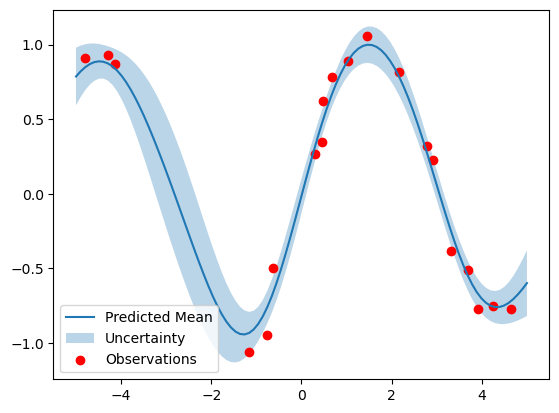

[1.04037151e+00 1.51463806e+02 1.39035960e-02 1.48712932e-23]
-22.924421317754355


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from GPR_CHOL_LS import GaussianProcessRegressionLengthscaleCholesky


I = 1
val_a = 1
val_b = 1
val_c = 0.2
a = np.full(I, val_a)
b = np.full(I, val_b)
c = np.full(I, val_c)

np.random.seed(0)
X = np.random.uniform(-5, 5, size=(20, 1))
y = np.sin(X[:, 0]) + np.random.normal(0, 0.1, size=(20,))



signal_variance = 1 #1
lengthscale = 0.1 #0.3
sigma_n = 0.4 #0.1
gpw = GaussianProcessRegressionLengthscaleCholesky("Squared Exponential", X, y, [signal_variance,lengthscale], sigma_n, [a,b,c])

gpw.fit()

X_test = np.linspace(-5, 5, 100).reshape(-1, 1)

yw_mean, yw_std = gpw.predict_original(X_test)

plt.plot(X_test, yw_mean, label='Predicted Mean')
plt.fill_between(X_test[:, 0], yw_mean.reshape(-1) - yw_std.reshape(-1), yw_mean.reshape(-1) + yw_std.reshape(-1), alpha=0.3, label='Uncertainty')
plt.scatter(X[:, 0], y, label='Observations', color='red')
plt.legend()
plt.show()
print(gpw.optimal_params)
print(gpw.log_marginal_likelihood())

[1.   0.01 1.   5.   0.1 ]279.7759584956208
[1.   0.01 1.   5.   0.1 ]279.7759584956208
[2.71828183 0.01       1.         5.         0.1       ]268.91778918697884
[1.37087457e+01 1.00000000e-02 1.00000000e+00 5.00000000e+00
 1.00000000e-01]261.6634720377274
[1.53276566e+01 1.00000000e-02 1.00000000e+00 5.00000000e+00
 1.00000000e-01]261.43513215931415
[1.83617845e+01 1.00000000e-02 1.00000000e+00 5.00000000e+00
 1.00000000e-01]261.11285467089516
[4.55124386e+01 1.00000000e-02 1.00000000e+00 5.00000000e+00
 1.00000000e-01]259.85631523365953
[1.97689561e+02 1.00000000e-02 1.00000000e+00 5.00000000e+00
 1.00000000e-01]258.9036467411128
[2.70432832e+02 1.00000000e-02 1.00000000e+00 5.00000000e+00
 1.00000000e-01]258.75170199336833
[4.4898775e+02 1.0000000e-02 1.0000000e+00 5.0000000e+00 1.0000000e-01]258.5173660135295
[1.46838162e+06 1.00000000e-02 1.00000000e+00 5.00000000e+00
 1.00000000e-01]257.9807884114963
[7.13819537e+11 1.00000000e-02 1.00000000e+00 5.00000000e+00
 1.00000000e-01]25

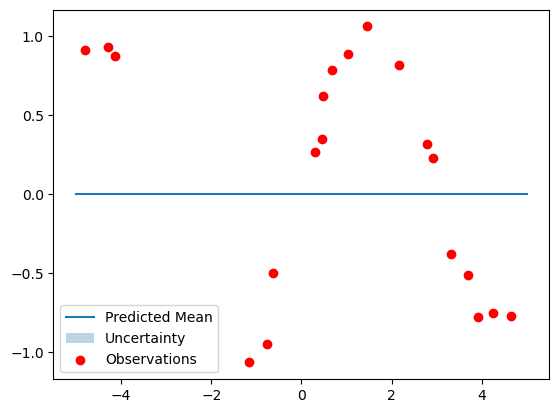

[9.89547703e+22 1.57568906e+07 9.29697550e-01 2.90200643e-29
 2.35380132e+02]
120.30329198369554


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from GPR_CHOL_LS_V import GaussianProcessRegressionLengthscaleVarianceCholesky
I = 1
val_a = 1
val_b = 5
val_c = 0.1
a = np.full(I, val_a)
b = np.full(I, val_b)
c = np.full(I, val_c)

# Generate some random data
np.random.seed(0)
X = np.random.uniform(-5, 5, size=(20, 1))
y = np.sin(X[:, 0]) + np.random.normal(0, 0.1, size=(20,))



signal_variance = 1 #1
lengthscale = 1 #0.3
sigma_n = 0.01 #0.1
gpw = GaussianProcessRegressionLengthscaleVarianceCholesky("Squared Exponential", X, y, [signal_variance,lengthscale], sigma_n, [a,b,c])

gpw.fit()

X_test = np.linspace(-5, 5, 100).reshape(-1, 1)

[yw_mean, yw_std] = gpw.predict_original(X_test)


plt.plot(X_test, yw_mean, label='Predicted Mean')
#plt.fill_between(X_test[:, 0], gpw.inverse_hyp_tan(y_mean.reshape(-1) - 2*yw_std.reshape(-1)), gpw.inverse_hyp_tan(yw_mean.reshape(-1) + 2*yw_std.reshape(-1)), alpha=0.3, label='Uncertainty')
plt.fill_between(X_test[:, 0], yw_mean.reshape(-1) - yw_std.reshape(-1), yw_mean.reshape(-1) + yw_std.reshape(-1), alpha=0.3, label='Uncertainty')


plt.scatter(X[:, 0], y, label='Observations', color='red')
plt.legend()
plt.show()
print(gpw.optimal_params)
print(gpw.log_marginal_likelihood())

In [6]:
gpw.sigma_n

15756890.575259648

In [7]:
np.sum(np.log(gpw.df_dy))

321.5133352685255